In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete") 

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Setup Complete


In [6]:
# load="../input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv"
load="AirPollutionSeoul/Measurement_summary.csv"

data= pd.read_csv(load)
data.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


C:\Users\dlwlg\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\dlwlg\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\dlwlg\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


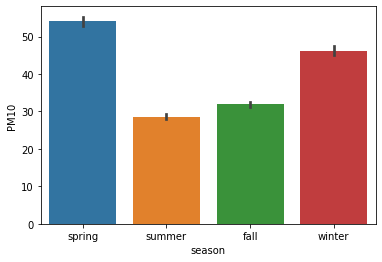

In [7]:
#SO2-이산화항/ NO2 PM10 - 미세먼지/ PM2.5 초미세먼지
#데이터 양이 너무 많아, 2017년 데이터와 주소지 중 종로구에 속한 측정치만 뽑아냄.
df1 = data.loc[(data['Measurement date'].str.contains("2017"))&(data['Address'].str.contains("Jongno-gu"))]
df1.sort_values(by='Measurement date')
#len(df1)=>8780을 고려하여, 대략적으로 계절을 나눔
jongro_spring=df1[1420:3590] #3~5
jongro_summer=df1[3590:5800] #6~9
jongro_fall=df1[5800:8010]#9-11
#겨울은 12,1,2월이므로 concat 작업을 거친다.
jongro_Dec=df1[8010:]
jongro_Jan_Feb=df1[:1420]
jongro_winter=pd.concat([jongro_Dec,jongro_Jan_Feb])

#데이터를 다시 합치기 전에, 데이터별로 구분되기 위해서, 데이터별로 열을 추가함.
jongro_spring['season'] = 'spring'
jongro_summer['season'] = 'summer'
jongro_fall['season'] = 'fall'
jongro_winter['season'] = 'winter'

season_data_of_jongro=pd.concat([jongro_spring,jongro_summer,jongro_fall,jongro_winter])
#2017 종로, 계절별 미세먼지, 초미세먼지, 오존 지수
season_data_of_jongro
sns.barplot(data=season_data_of_jongro, x='season', y='PM10')
#sns.barplot(data=season_data_of_jongro, x='season', y='PM2.5')
#sns.barplot(data=season_data_of_jongro, x='season', y='O3')



C:\Users\dlwlg\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dlwlg\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\dlwlg\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

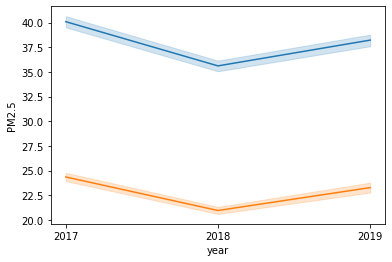

In [8]:
#2017, 2018, 2019 연도별 종로구의 미세먼지, 초미세먼지, 오존을 비교해보기
jongro_2017= df1
jongro_2018 = data.loc[(data['Measurement date'].str.contains("2018"))&(data['Address'].str.contains("Jongno-gu"))]
jongro_2019 = data.loc[(data['Measurement date'].str.contains("2019"))&(data['Address'].str.contains("Jongno-gu"))]
jongro_2018.sort_values(by='Measurement date')
jongro_2019.sort_values(by='Measurement date')
#x축으로 사용하기 위해, year columns 만들기
jongro_2017['year'] = '2017'
jongro_2018['year'] = '2018'
jongro_2019['year'] = '2019'

#데이터 concat으로 합치기
jongro_basedonyears=pd.concat([jongro_2017,jongro_2018,jongro_2019])
sns.lineplot(data=jongro_basedonyears, x='year', y='PM10') #미세먼지
sns.lineplot(data=jongro_basedonyears, x='year', y='PM2.5') #초미세먼지
#sns.lineplot(data=jongro_basedonyears, x='year', y='O3') #오존

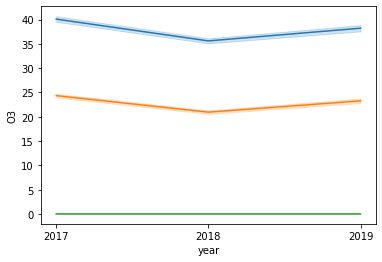

In [52]:
#연도별 계절도 비교 해보겠습니다!....나중에...ㅎ 한 주동안 감사했습니다! 드라화이팅!
#jongro_spring18=df2[1416:3600] #3~5
#jongro_spring18

#jongro_summer18=df2[3600:5832] #6-8
#jongro_summer18

#jongro_fall18=df2[5832:8016]
#jongro_fall18 #9-11

#jongro_Dec18=df2[8016:]
#jongro_Jan_Feb18=df2[:1416]
#jongro_winter18=pd.concat([jongro_Dec18,jongro_Jan_Feb18])
#jongro_winter18